### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [49]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import plotly.express as px
from sklearn.decomposition import PCA

In [50]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [51]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [52]:
df.shape

(2240, 29)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [54]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Попереднє ознайомлення з файлом надало нам наступну інформацію:

Файл налічує 2240 рядків та 29 колонок.

Більшість значень мають тип даних int64, вийняток Education, Marital_Status та Dt_Customer з типом значень object, і Income з типом значень float64.

Той же Income єдиний має пропущені значення - 24.

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [55]:
income_median = df['Income'].median()

print(f"Медіана річного доходу: {income_median:,.2f}")

Медіана річного доходу: 51,381.50


In [56]:
df['Income'] = df['Income'].fillna(income_median)

In [57]:
df['Income'].isnull().sum()

np.int64(0)

Вирішила заповнювати пропущені значення медіаною, бо такий підхід допомагає боротися з викідами. Як раз з такою ознакою як Income, шанс що десь буде пара-трійка значень з супер-високим доходом доволі великий, але основна маса буде відносно середньою, медіана здається найкращим вибором.

Також, відсоток пропущених значень у нас досіть малий, тому заповнення медіаною є надійною та простою процедурою.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

### Обробка Категоріальних Ознак

In [58]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [59]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

В `Marital_Status` є трохи дивні значення `Absurd`, `YOLO`. Думаю що їх краще обʼєднати в значеннь `Other`. Також є такі значення як  `Together` та `Married`, що, в контексті профіля клієнта, можна трактувати що у клієнта є партнер. Тому, думаю, можна буде додати таку ознаку `is_Partner`, щоб відобрпзити суть статусу.

In [60]:
major_statuses = ['Married', 'Together', 'Single', 'Divorced', 'Widow']

In [61]:
df['Marital_Status'] = df['Marital_Status'].apply(
    lambda x: x if x in major_statuses else 'Other'
)

In [62]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Other'],
      dtype=object)

In [63]:
partner_statuses = ['Married', 'Together']
df['Is_Partner'] = df['Marital_Status'].apply(lambda x: 1 if x in partner_statuses else 0)

In [64]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

### Обробка Колонки з Датою

Для побудови портрету клієнта дата його реєстрації не дуже інформативною. Набагато доцільніше буде зазначити як довго цей клієнт з нами. Тому можна додати нову ознаку, яка буде як раз таки показувати тривалість наших "стосунків".

Так само, для зручності "читання" портрета клієнта, переведу `Year_Birth` на `Age`

In [65]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [66]:
end_date = df['Dt_Customer'].max()

print(f"Дата останнього спостереження (end_date): {end_date.strftime('%Y-%m-%d')}")

Дата останнього спостереження (end_date): 2014-06-29


In [67]:
df['Customer_Tenure_Days'] = (end_date - df['Dt_Customer']).dt.days

In [68]:
current_year = end_date.year
df['Age'] = current_year - df['Year_Birth']

In [69]:
df.drop(columns=['Dt_Customer', 'Year_Birth'], inplace=True)

In [70]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure_Days,Age
0,5524,58138.0,0,0,58,635,88,546,172,88,...,True,False,False,False,False,True,False,False,663,57
1,2174,46344.0,1,1,38,11,1,6,2,1,...,True,False,False,False,False,True,False,False,113,60
2,4141,71613.0,0,0,26,426,49,127,111,21,...,True,False,False,False,False,False,True,False,312,49
3,6182,26646.0,1,0,26,11,4,20,10,3,...,True,False,False,False,False,False,True,False,139,30
4,5324,58293.0,1,0,94,173,43,118,46,27,...,False,False,True,True,False,False,False,False,161,33


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [71]:
features_to_cluster = [col for col in df.columns if col != 'ID']
X = df[features_to_cluster].copy()

In [72]:
kmeans_unscaled = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels_unscaled = kmeans_unscaled.fit_predict(X)

df['Cluster'] = cluster_labels_unscaled

silhouette_unscaled = silhouette_score(X, cluster_labels_unscaled)

print(f"Метрика силуету для K=3: {silhouette_unscaled:.4f}")

Метрика силуету для K=3: 0.5379


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

Для 3D візуалізації використаємо:

Вісь X: Income (Дохід)

Вісь Y: Total_Spent (Загальні витрати)

Вісь Z: Total_Purchases (Загальна кількість покупок)

In [73]:
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

fig = px.scatter_3d(
    df,
    x='Income',
    y='Total_Spent',
    z='Total_Purchases',
    color='Cluster',
    symbol='Cluster',
    title='3D Візуалізація Кластерів: Дохід vs Витрати vs Покупки',
    labels={
        'Income': 'Дохід (Income)',
        'Total_Spent': 'Загальні Витрати (Total_Spent)',
        'Total_Purchases': 'Загальна Кількість Покупок (Total_Purchases)',
        'Cluster': 'Кластер'
    },
    color_continuous_scale=px.colors.qualitative.Plotly
)

fig.update_layout(scene_zaxis_type="log")
fig.show()

**Спостереження**

Цей графік найчіткіше показує, як формуються кластери, коли дохід не масштабований.

Помаранчевий кластер показує скупчення точок з низьким доходом (переважно $0-$50k) та низькими витратами. Це сегмент з найнижчою цінністю/бюджетний.

Синій та Зелений кластери сформували велику, розтягнуту групу, що охоплює середній та високий дохід ($50k - $200k) та більшість діапазону витрат. Це "решта" клієнтів.

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']

fig = px.scatter(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    color='Cluster',
    title='2D Візуалізація Кластерів за допомогою PCA',
    hover_data={'Cluster': True, 'Principal Component 1': ':.2f', 'Principal Component 2': ':.2f'}
)

fig.update_layout(xaxis_title='Головна Компонента 1 (PC1)', yaxis_title='Головна Компонента 2 (PC2)')
fig.show()

**Спостереження**

Цей графік підтверджує домінування ознаки з великим масштабом, оскільки PC1 тепер виглядає як Дохід або Сума Витрат.

**Завдання 6**. Масштабуйте дані (StandardScaler/MinMaxScaler) і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Розмірність даних для кластеризації (X): {X_scaled.shape}")

Розмірність даних для кластеризації (X): (2240, 36)


In [76]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels

In [77]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"Метрика силуету для K=3: {silhouette_avg:.4f}")

Метрика силуету для K=3: 0.1107


In [78]:
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

fig = px.scatter_3d(
    df,
    x='Income',
    y='Total_Spent',
    z='Total_Purchases',
    color='Cluster',
    symbol='Cluster',
    title='3D Візуалізація Кластерів: Дохід vs Витрати vs Покупки',
    labels={
        'Income': 'Дохід (Income)',
        'Total_Spent': 'Загальні Витрати (Total_Spent)',
        'Total_Purchases': 'Загальна Кількість Покупок (Total_Purchases)',
        'Cluster': 'Кластер'
    },
    color_continuous_scale=px.colors.qualitative.Plotly
)

fig.update_layout(scene_zaxis_type="log")
fig.show()

**Спостереження**

Загалом вже краще видно картинку.

Кластер Помаранчевий: Скупчення точок з низькими значеннями на всіх трьох осях (Income, Total Spent, Total Purchases). Це клієнти-початківці або з найнижчою цінністю.

Кластер Синій та Кластер Зелений: Формують дві вищі, але переплетені групи. Кластер Синій здається більш зосередженим на високих витратах/покупках при середньому доході, тоді як Кластер Зелений займає широкий простір, включаючи клієнтів з найвищим доходом.

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']

fig = px.scatter(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    color='Cluster',
    title='2D Візуалізація Кластерів за допомогою PCA',
    hover_data={'Cluster': True, 'Principal Component 1': ':.2f', 'Principal Component 2': ':.2f'}
)

fig.update_layout(xaxis_title='Головна Компонента 1 (PC1)', yaxis_title='Головна Компонента 2 (PC2)')
fig.show()

**Спостереження**

Ми маємо не супер-чітке, але все ж такі розділення на 3 кластери, які можу інтерпрерувати так:

- Жовтий колір: Бюджетні/Неактивні клієнти: найнижчий Дохід та Витрати. Цей кластер найкраще відділений від інших двох, що вказує на доволі чіткій профіль.

- Синій колір: Цінні клієнти, розташовані переважно в центрі та праворуч, кластер має помірний ступінь розділення.

- Рожевий колір: Преміум/Високодохідні коієнти, розташовані праворуч, з невеликим перекриттям із синім кластером.

Ці кластери мають чіткий фінансово-поведінковий сенс:

**Кластер 0: Цінні Клієнти**

*Профіль*: Клієнти з хорошим, стабільним доходом (до $100k), які є дуже активними покупцями і багато витрачають. Вони — "хребет" компанії.

**Кластер 1: Бюджетні/Неактивні Клієнти**

*Профіль*: Клієнти з найнижчим доходом, які мінімально витрачають і рідко роблять покупки.

**Кластер 2: Преміум/Високодохідні**

*Профіль*: Клієнти з найвищим фінансовим потенціалом, включаючи рідкісні випадки надвисокого доходу (понад $150k). Їхні витрати та покупки високі, але їхня поведінка може бути більш розсіяна (менш передбачувана).

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [80]:
df = df[df['Income'] < 170000]

df = df[df['Age'] < 100]

In [81]:
features_to_cluster = [col for col in df.columns if col not in ['ID', 'Total_Spent', 'Total_Purchases', 'Cluster']]
X_clean = df[features_to_cluster].copy()

scaler_clean = StandardScaler()
X_scaled_clean = scaler_clean.fit_transform(X_clean)

In [82]:
kmeans_clean = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels_clean = kmeans_clean.fit_predict(X_scaled_clean)

df['Cluster_Clean'] = cluster_labels_clean

silhouette_clean = silhouette_score(X_scaled_clean, cluster_labels_clean)

print(f"\nМетрика силуету на очищених даних: {silhouette_clean:.4f}")


Метрика силуету на очищених даних: 0.1093


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

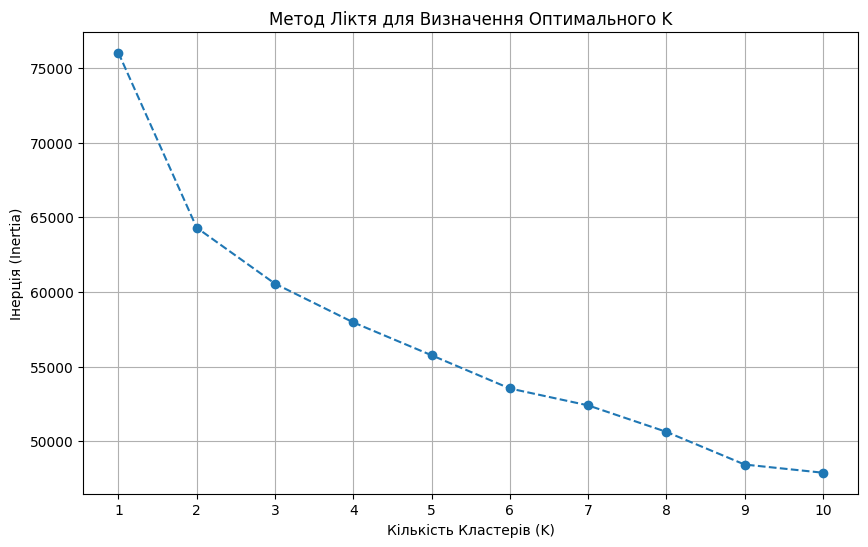

In [83]:
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model.fit(X_scaled_clean)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Метод Ліктя для Визначення Оптимального K')
plt.xlabel('Кількість Кластерів (K)')
plt.ylabel('Інерція (Inertia)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

На цьому графіку видно, що інерція різко зменшується при переході від K = 1 до K = 3, після чого спад стає більш пологим. Отже оптимальне число кластерів K = 3, оскільки подальше збільшення кількості кластерів уже не дає суттєвого зменшення інерції.

Всі розрахунки для такої кількості кластерів були зроблені вище.

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X_unscaled_clean = df[features_to_cluster].copy()

linked = linkage(X_unscaled_clean, method='single')

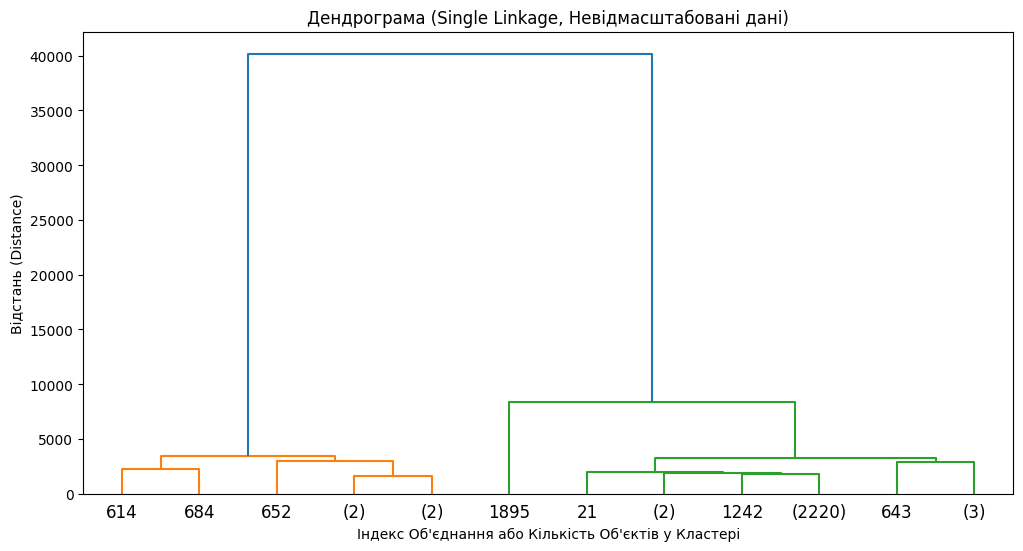

In [85]:
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True
)
plt.title('Дендрограма (Single Linkage, Невідмасштабовані дані)')
plt.xlabel('Індекс Об\'єднання або Кількість Об\'єктів у Кластері')
plt.ylabel('Відстань (Distance)')
plt.show()

**Спостереження**

Те що одразу кидається в око - дуже високі відстані в основному обʼєднанні (понад 40000).

Вся структура даних обʼєднана в дві великі гілки на дуже низьких відстанях. Це є наслідком того, що дані не масштабовані і де ознака `Income` повністю домінує.


In [86]:
clusters_2 = fcluster(linked, 2, criterion='maxclust')
clusters_3 = fcluster(linked, 3, criterion='maxclust')

df['HAC_K2'] = clusters_2
df['HAC_K3'] = clusters_3

print(f"Розмір кластерів для K=2: {df['HAC_K2'].value_counts()}")
print(f"Розмір кластерів для K=3: {df['HAC_K3'].value_counts()}")

Розмір кластерів для K=2: HAC_K2
2    2229
1       7
Name: count, dtype: int64
Розмір кластерів для K=3: HAC_K3
2    2228
1       7
3       1
Name: count, dtype: int64


In [87]:
pca_hac = PCA(n_components=2)
X_pca_hac = pca_hac.fit_transform(X_unscaled_clean)
pca_df_hac = pd.DataFrame(data=X_pca_hac, columns=['PC1', 'PC2'])

In [88]:
pca_df_hac['Cluster'] = df['HAC_K2'].astype(str)
fig_k2 = px.scatter(pca_df_hac, x='PC1', y='PC2', color='Cluster',
                    title='HAC (Single Linkage) Візуалізація K=2',
                    labels={'color': 'Кластер'})
fig_k2.show()

**Спостереження**

Кластер 2 є домінуючим, точки зосереджені в центрі (від -50к до 50к).

Кластер 1 складається з кількох точок, що скоріш за все є викідами або якімось аномальними клієнтами.

Тому вважаю, що К-2 кластерізація по суті просто відокреила клієнтів-викідів, тому це більше схоже не на сегментацію, а на виявлення аномалій.

In [89]:
pca_df_hac['Cluster'] = df['HAC_K3'].astype(str)
fig_k3 = px.scatter(pca_df_hac, x='PC1', y='PC2', color='Cluster',
                    title='HAC (Single Linkage) Візуалізація K=3',
                    labels={'color': 'Кластер'})
fig_k3.show()

**Спостереження**

Кластер 2 знову має абсолютну більшість даних.

Кластер 1 та 3 - знову ж таки кілька доволі ізольованих точок. Кластер 3 має всього лише одну точку.

Single Linkage на невідмасштабованих даних просто відриває точки-аномалії. Збільшення К лише створює нові групи для цих аномалій.

**Висновок**

Обидві кластерізації є абсолютно невдалими. Немасштабовані дані роблять неможливим використання будь-якого алгоритма, що базується на відстанях.

In [90]:
silhouette_hac_3 = silhouette_score(X_unscaled_clean, clusters_3)

print(f"Метрика силуету для Ієрархічної кластеризації (K=3): {silhouette_hac_3:.4f}")

Метрика силуету для Ієрархічної кластеризації (K=3): 0.5586


**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [91]:
from sklearn.cluster import DBSCAN

In [92]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled_clean)

df['Cluster_DBScan'] = dbscan_labels

X_clustered = X_scaled_clean[dbscan_labels != -1]
labels_clustered = dbscan_labels[dbscan_labels != -1]

In [93]:
if len(np.unique(labels_clustered)) > 1:
    silhouette_dbscan = silhouette_score(X_clustered, labels_clustered)
else:
    silhouette_dbscan = np.nan

In [94]:
n_clusters = len(np.unique(dbscan_labels[dbscan_labels != -1]))

In [95]:
print(f"Кількість знайдених кластерів (без шуму): {n_clusters}")
print(f"Кількість точок, позначених як шум (-1): {np.sum(dbscan_labels == -1)}")
print(f"Метрика силуету (для точок кластерів): {silhouette_dbscan:.4f}")

Кількість знайдених кластерів (без шуму): 10
Кількість точок, позначених як шум (-1): 2150
Метрика силуету (для точок кластерів): 0.3834


In [97]:
pca_dbscan = PCA(n_components=2)
X_pca_dbscan = pca_dbscan.fit_transform(X_scaled_clean)

pca_df_dbscan = pd.DataFrame(data=X_pca_dbscan, columns=['PC1', 'PC2'])
pca_df_dbscan['Cluster'] = df['Cluster_DBScan'].astype(str)

fig_dbscan = px.scatter(
    pca_df_dbscan,
    x='PC1',
    y='PC2',
    color='Cluster',
    title=f'DBScan Кластеризація (eps=1.2, min_samples=5)',
    labels={'color': 'Кластер'}
)
fig_dbscan.show()

**Спостереження**

Основна маса точок зафарбована в фіолетовий колір і є шумом, це одначає що більшість клієнтів не утворюють чіткіх груп (за обраними параметрами). Вони надто розсіяні.

Чи є дана кластерізація корисною?

Для загальної маркетинговою сегментації - ні. Дана кластерізація не дає розуміння профілю клієнта, бо більша частина клієнтів не була сегментованою.

**Висновок**

K-Means (K=3) на масштабованих даних залишається найкращим і найкориснішим методом, оскільки він ефективно розділяє всі точки на три змістовні групи, незважаючи на низький силует.

DBScan показав, що в багатовимірному просторі наші клієнти дуже розсіяні. Він може і підходить для виявлення аномалій, але не для загальної сегментації.